# Raster Manipulation I 

### About the Data

Data from the Copernicus Digital Elevation Model (DEM):
- based satellite lidar measurements of the Earth's surface 
- at 90-meter resolution per pixel
- tiles are 1degree x 1degree latitude/longitude 
- value in each pixel represents vertical units measured in meters

Import the libraries we will use:

In [1]:
import os
import numpy as np

import xarray as xr
import rioxarray as rioxr

## Exercise 

1. Use `os` to create a file path to the grand_canyon_DEM.tif file and import the raster into a variable named `gc`
2. Plot the raster, check the CRS, and create a histogram with updated bins

CRS:  EPSG:4326


(array([  8673.,  25324.,  69304., 169736., 359588., 382075., 160902.,
         85976., 102555.,  75867.]),
 array([ 528.    ,  756.0801,  984.1601, 1212.2401, 1440.3202, 1668.4003,
        1896.4803, 2124.5603, 2352.6404, 2580.7205, 2808.8005],
       dtype=float32),
 <BarContainer object of 10 artists>)

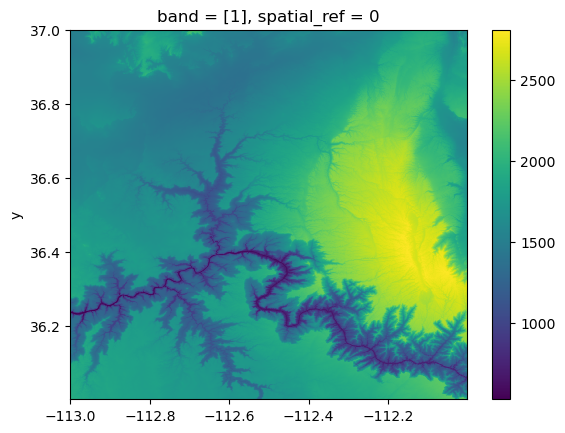

In [12]:
# load grand canyon tif file using `os`
gc_fp = os.path.join(os.getcwd(),'data','grand_canyon_DEM.tif')
gc = rioxr.open_rasterio(gc_fp)
gc

# plot the raster
gc.plot()

# CRS for gc
print('CRS: ', gc.rio.crs)

(array([  368.,  1002.,  1763.,  2381.,  3159.,  3607.,  3764.,  4101.,
         5526.,  8326.,  9853.,  9862., 11583., 15865., 22141., 31803.,
        29119., 25586., 32636., 50592., 59436., 76685., 89187., 73194.,
        61086., 65553., 97401., 81974., 76432., 60715., 44639., 37562.,
        29224., 25343., 24134., 18892., 16106., 16701., 16172., 18105.,
        17835., 18320., 20887., 21894., 23619., 20837., 19375., 17494.,
        12246.,  5915.]),
 array([ 528.     ,  573.616  ,  619.232  ,  664.848  ,  710.46405,
         756.0801 ,  801.69604,  847.3121 ,  892.9281 ,  938.54407,
         984.1601 , 1029.7761 , 1075.3921 , 1121.0082 , 1166.6241 ,
        1212.2401 , 1257.8562 , 1303.4722 , 1349.0881 , 1394.7042 ,
        1440.3202 , 1485.9363 , 1531.5522 , 1577.1682 , 1622.7843 ,
        1668.4003 , 1714.0162 , 1759.6323 , 1805.2483 , 1850.8643 ,
        1896.4803 , 1942.0963 , 1987.7124 , 2033.3284 , 2078.9443 ,
        2124.5603 , 2170.1763 , 2215.7925 , 2261.4084 , 2307.0244 

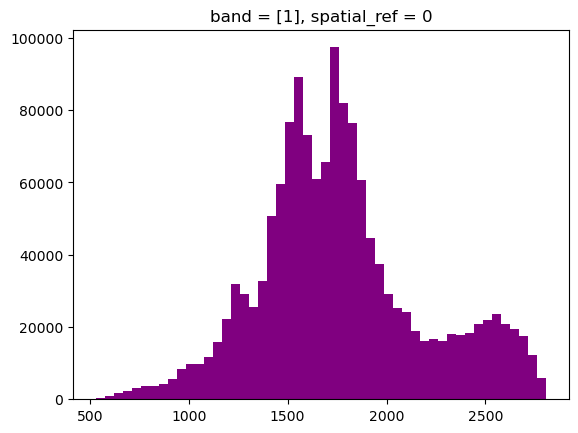

In [17]:
# create a histogram with updated bins
gc.plot.hist(bins = 50, color = "purple")


## Dropping a Dimension

Notice our raster has an unnecessary extra dimension: band.

This is making our dataset 3-dimensional, when it's not needed.

We can lean this `xarray.DataArray` by:

1. Using the `squeeze()` method: if we don't pass any parameters, then `squeeze()` gets rid of all dimensions of length 1. Then
2. getting rid of the coordinates associated to the dimension we dropped We can do this using `drop()` method and specifying the names of the coors we want to remove

Let's do it:

In [18]:
# original dimensions and coordinates
print(gc.dims, gc.coords,'\n')

# remove length 1 dimension (band)
gc = gc.squeeze()
print(gc.dims, gc.coords,'\n')

# remove coordinates associated to band
gc = gc.drop('band')
print(gc.dims, gc.coords)

('band', 'y', 'x') Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -113.0 -113.0 -113.0 ... -112.0 -112.0 -112.0
  * y            (y) float64 37.0 37.0 37.0 37.0 37.0 ... 36.0 36.0 36.0 36.0
    spatial_ref  int64 0 

('y', 'x') Coordinates:
    band         int64 1
  * x            (x) float64 -113.0 -113.0 -113.0 ... -112.0 -112.0 -112.0
  * y            (y) float64 37.0 37.0 37.0 37.0 37.0 ... 36.0 36.0 36.0 36.0
    spatial_ref  int64 0 

('y', 'x') Coordinates:
  * x            (x) float64 -113.0 -113.0 -113.0 ... -112.0 -112.0 -112.0
  * y            (y) float64 37.0 37.0 37.0 37.0 37.0 ... 36.0 36.0 36.0 36.0
    spatial_ref  int64 0


## Global Information

To get a better sense of our raster data we can apply common `numpy` functions to extract information from the `xarray.DataArray` underlying `np.array`.

For example, we can get the maximum across all the `xarray.DataArray`’s values by using the `max()` method:

In [ ]:
# get the maximum elevation value (get an xarray.DataArray)
gc.max()

Notice that the output for this method is another `xarray.DataArray`. In general, methods that reduce or subset an `xarray.DataArray` will always return another `xarray.DataArray`. To extract the value from a 1x1 `xarray.DataArray` as a number we use the `.item()` method:

In [ ]:
# get the maximum elevation value as a number
gc.max().item()

## F-Strings

So far we have printed variables using string concatenation inside the `print()` function. This means that we write commas between every string and variable we want to print, and then the print function concatenates these into a single string. For example:


In [ ]:
# minimum elevation
# print via concatenation
print("Minimum elevation: ", gc.min().item())

Another popular way of mixing strings and variables in print statements is by creating an f-string which stands for “formatted string”. The simplest syntax for an f-string is:

```python
f" some text {replace}"
```

where replace can be a variable, an expression, or a function or method call. For example:

In [ ]:
# f-string with mean elevation
f"Mean elevation: {gc.mean().item()}"

We just created a string replacing the value inside the curly brackets {}. Notice the computation is occurring in real time as the string gets made and there’s no need to define any extra variables.

One of the advantages of using f-strings is that they offer customization for formatting the output, without the need to use extra functions. For example, if we want to print the median value of our raster rounded to two decimals we can do:

In [20]:
# median elevation, rounded to two decimals
# print via f-string formatting
print(f"Median elevation: {gc.median().item():.2f}")

Median elevation: 1726.15


## Aggregation

Let’s go back to our raster. Rasters with high spatial resolution can offer great insight into fine-scale patterns, but can also be challenging to process due to their size. In these cases, it can be useful to use an aggregation method to spatially downsample and obtain a raster with a coarser resolution.

To spatially downsample an xarray.DataArray we use the coarsen() method followed by an aggreagator function. The general syntax to coarsen a 2-dimensional:

```python
xdataarray.coarsen(x=x_winside, y=y_winside).aggr()
```
where:

- `xdataarray` is a 2-dimensional `xarray.DataArray` with dimensions `x` and `y`.
- `x` and `y` are the names dimensions of the `xarray.DataArray` (these could have other names like `lon/lat`)
- `x_winside` and `y_winside` are the dimensions of the window used to make the aggregation.
- `aggr()` is an aggregator function, this is the function which will be applied to each window. Examples are `min()`, `max()`, `sum()` and `mean()`.

**Example**

Suppose we want to coarsen our Grand Canyon elevation raster from 1200x1200 pixels to a raster of 60x60 pixels where by calculating the maximun at each window. Remember the windows are non-overlapping, so we will obtain one pixel per window. A quick division tells us that to got from 1200x1200 to 60x60 we will need to use a 20x20 window. The aggregator function on each of this window will be `max()`. Our call looks like this:

In [27]:
# coarsen to a 60x60 raster calculating the max in each window
gc_coarse = gc.coarsen(x=20,y=20).max()
gc_coarse

<xarray.DataArray (y: 60, x: 60)>
array([[1543.2703, 1536.2582, 1905.042 , ..., 1752.2424, 1870.8307,
        1841.452 ],
       [1511.454 , 1548.8307, 1944.3944, ..., 1782.2041, 1881.2681,
        1925.4775],
       [1508.7517, 1549.587 , 1666.655 , ..., 1762.2898, 1769.2545,
        1974.3519],
       ...,
       [1944.1821, 1919.3833, 1891.5801, ..., 1898.1538, 1619.7513,
        1548.6755],
       [1932.8036, 1924.7229, 1894.8312, ..., 1732.8718, 1707.6681,
        1720.0978],
       [1948.1812, 1923.23  , 1898.333 , ..., 2224.2847, 2248.0986,
        2272.8677]], dtype=float32)
Coordinates:
  * x            (x) float64 -113.0 -113.0 -113.0 ... -112.0 -112.0 -112.0
  * y            (y) float64 36.99 36.98 36.96 36.94 ... 36.06 36.04 36.03 36.01
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

old resolution: 1200x1200
coarse resolution: 60x60


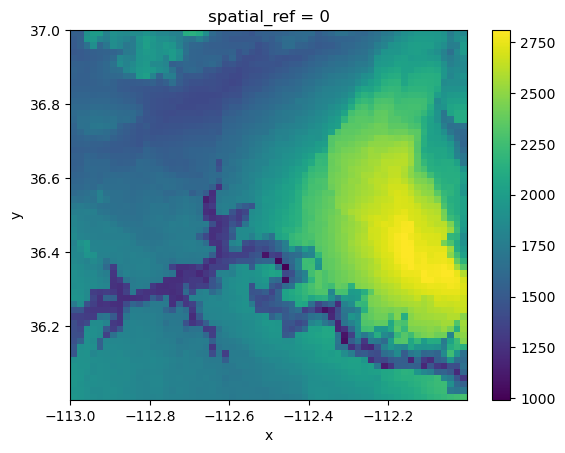

In [28]:
# inspect old and coarsened resolution
print(f"old resolution: {gc.rio.width}x{gc.rio.height}")
print(f"coarse resolution: {gc_coarse.rio.width}x{gc_coarse.rio.height}")
gc_coarse.plot()

**Exercise**

1. Downsample the elevation raster into a 240x240 raster by taking the average over windows of the appropriate size.

2. Use an f-string to check whether the bounds of the rasters have changed.

old bounds: [-113.0004   36.0004 -112.0004   37.0004]
coarse 2 new bounds: [-112.9988   36.0021 -112.0021   36.9988]


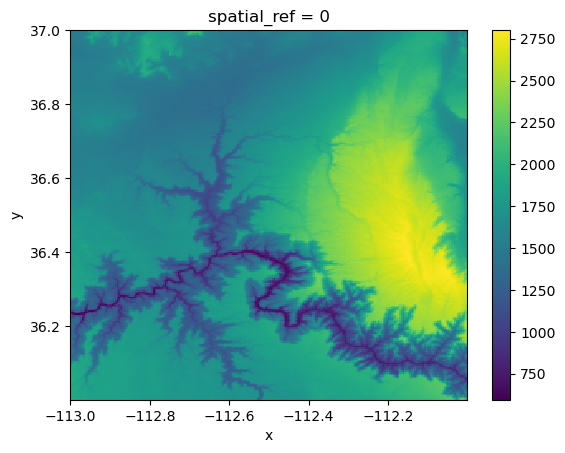

In [42]:
# coarsen to a 240x240 raster calculating the mean in each window
gc_coarse_2 = gc.coarsen(x=5,y=5).mean()
gc_coarse_2

#inspect old and coarsened bounds
print(f"old bounds: {np.round(gc.rio.bounds(), 4)}")
print(f"coarse 2 new bounds: {np.round(gc_coarse_2.rio.bounds(), 4)}")
gc_coarse_2.plot()
